# Miscellaneous

* Importing Packages
* Defining data sources

Nothing really interesting happening here.  

In [49]:
import pandas as pd

%matplotlib inline
import pylab as plt
import seaborn as sns

In [4]:
df_reviews = pd.read_csv('reviews.tsv', sep='\t')
df_products = pd.read_csv('products.tsv', sep='\t')

# Data Exploration  

## Reviews.tsv

In [38]:
df_reviews.shape

(3849, 19)

In [30]:
%%time

df_reviews.apply(lambda x: pd.Series({'uniqueCount':len(x.unique()), 'sample': x.unique().tolist()}) , axis = 0).T

Wall time: 23 ms


,uniqueCount,sample
abuseCount,5,"[0, 1, 2, 3, 4]"
customerNickname,351,"[iHerb Customer, InnaIgorevna, Maxchen, Mahaab..."
helpfulNo,8,"[0, 1, 2, 3, 4, 5, 9, 6]"
helpfulYes,33,"[6, 0, 1, 5, 4, 3, 21, 20, 16, 2, 31, 22, 8, 1..."
id,3765,"[05c2b17e-c28d-4792-930d-27e787d8d4ad, 80e44af..."
imagesCount,6,"[1, 0, 2, 4, 3, 5]"
languageCode,12,"[en-US, ru-RU, he-IL, ar-SA, ja-JP, es-MX, fr-..."
postedDate,3765,"[2021-01-27T09:04:10.569Z, 2021-02-07T00:56:39..."
productId,27,"[103839, 101691, 102455, 103204, 103205, 10384..."
profileInfo.ugcSummary.answerCount,79,"[0.0, 7.0, 1.0, 41.0, 2.0, 11.0, 8.0, 63.0, 32..."


In [17]:
df_reviews[df_reviews.abuseCount == 4]

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
1619,4,iHerb Customer,1,50,1b984b26-b290-4ffb-8e8e-8ed8cbb5dbdd,1,en-US,2020-05-20T17:39:59.67Z,99829,0.0,6.0,40,"Bought this on a whim as a ""trial"" offer on iH...","Fits securely, stylish, should offer some prot...",True,1.609048e+09,en-US,NaN,NaN


## Products.tsv

In [39]:
df_products.shape

(27, 4)

In [31]:
%%time

df_products.apply(lambda x: pd.Series({'uniqueCount':len(x.unique()), 'sample': x.unique().tolist()}) , axis = 0).T

Wall time: 5 ms


,uniqueCount,sample
product_id,27,"[103205, 101774, 101955, 103838, 102734, 10083..."
product_name,26,"[Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )..."
product_price,18,"[2.95, 8.86, 6.85, 15.35, 5.61, 3.93, 50.19, 6..."
price_currency,1,[AUD]
product_availability,1,[http://schema.org/InStock]
product_url,27,[https://au.iherb.com/pr/Hwipure-Disposable-KF...
source_url,1,[https://au.iherb.com/c/protective-face-masks]


In [32]:
cols_product = [
    'product_id',      # 27 unique products in reviews too
    'product_name',    # one duplicated name
    'product_price',   # all prices in AUD
    'product_url'      # find the page for the mask
]

In [35]:
df_products = df_products[cols_product]

## Join Data

In [36]:
%%time

df_productReview = pd.merge(df_products, df_reviews,
                           left_on = 'product_id', right_on = 'productId',
                           how = 'inner')


df_productReview.apply(lambda x: pd.Series({'uniqueCount':len(x.unique()), 'sample': x.unique().tolist()}) , axis = 0).T

Wall time: 42.2 ms


,uniqueCount,sample
product_id,27,"[103205, 101774, 101955, 103838, 102734, 10083..."
product_name,26,"[Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )..."
product_price,18,"[2.95, 8.86, 6.85, 15.35, 5.61, 3.93, 50.19, 6..."
product_url,27,[https://au.iherb.com/pr/Hwipure-Disposable-KF...
abuseCount,5,"[0, 1, 2, 3, 4]"
customerNickname,351,"[iHerb Customer, djagi, TMC, INNAg, emmaiherb,..."
helpfulNo,8,"[1, 0, 2, 3, 4, 9, 6, 5]"
helpfulYes,33,"[22, 20, 8, 10, 1, 4, 0, 2, 3, 7, 16, 5, 15, 1..."
id,3765,"[f994c3a0-c667-47a3-ba13-b18926b3a5c1, 018c277..."
imagesCount,6,"[0, 1, 2, 3, 4, 5]"


In [59]:
# df_productReview.to_csv('ProductReviews.csv')

# Visualisations  

## Preliminary Questions  

* Data understanding   
    * abuseCount  
    * helpfulNo
    * helpfulYes
    * profileInfo.ugcSummary.answerCount
    * profileInfo.ugcSummary.reviewCount	
    * score

<br>  

* Does each *id* uniquely identify each user making the comment?
    * currently assumed to be so as reviews.tsv has 3849 rows while there is only 3765 *id* values
* what is the distribution of reviews in each feature  


In [73]:
cols = ['product_id',
 'product_price',
 'abuseCount',
 'helpfulNo',
 'helpfulYes',
 'imagesCount',
 'ratingValue',
 'reviewed',
 'languageCode.1',
 'languageCode']

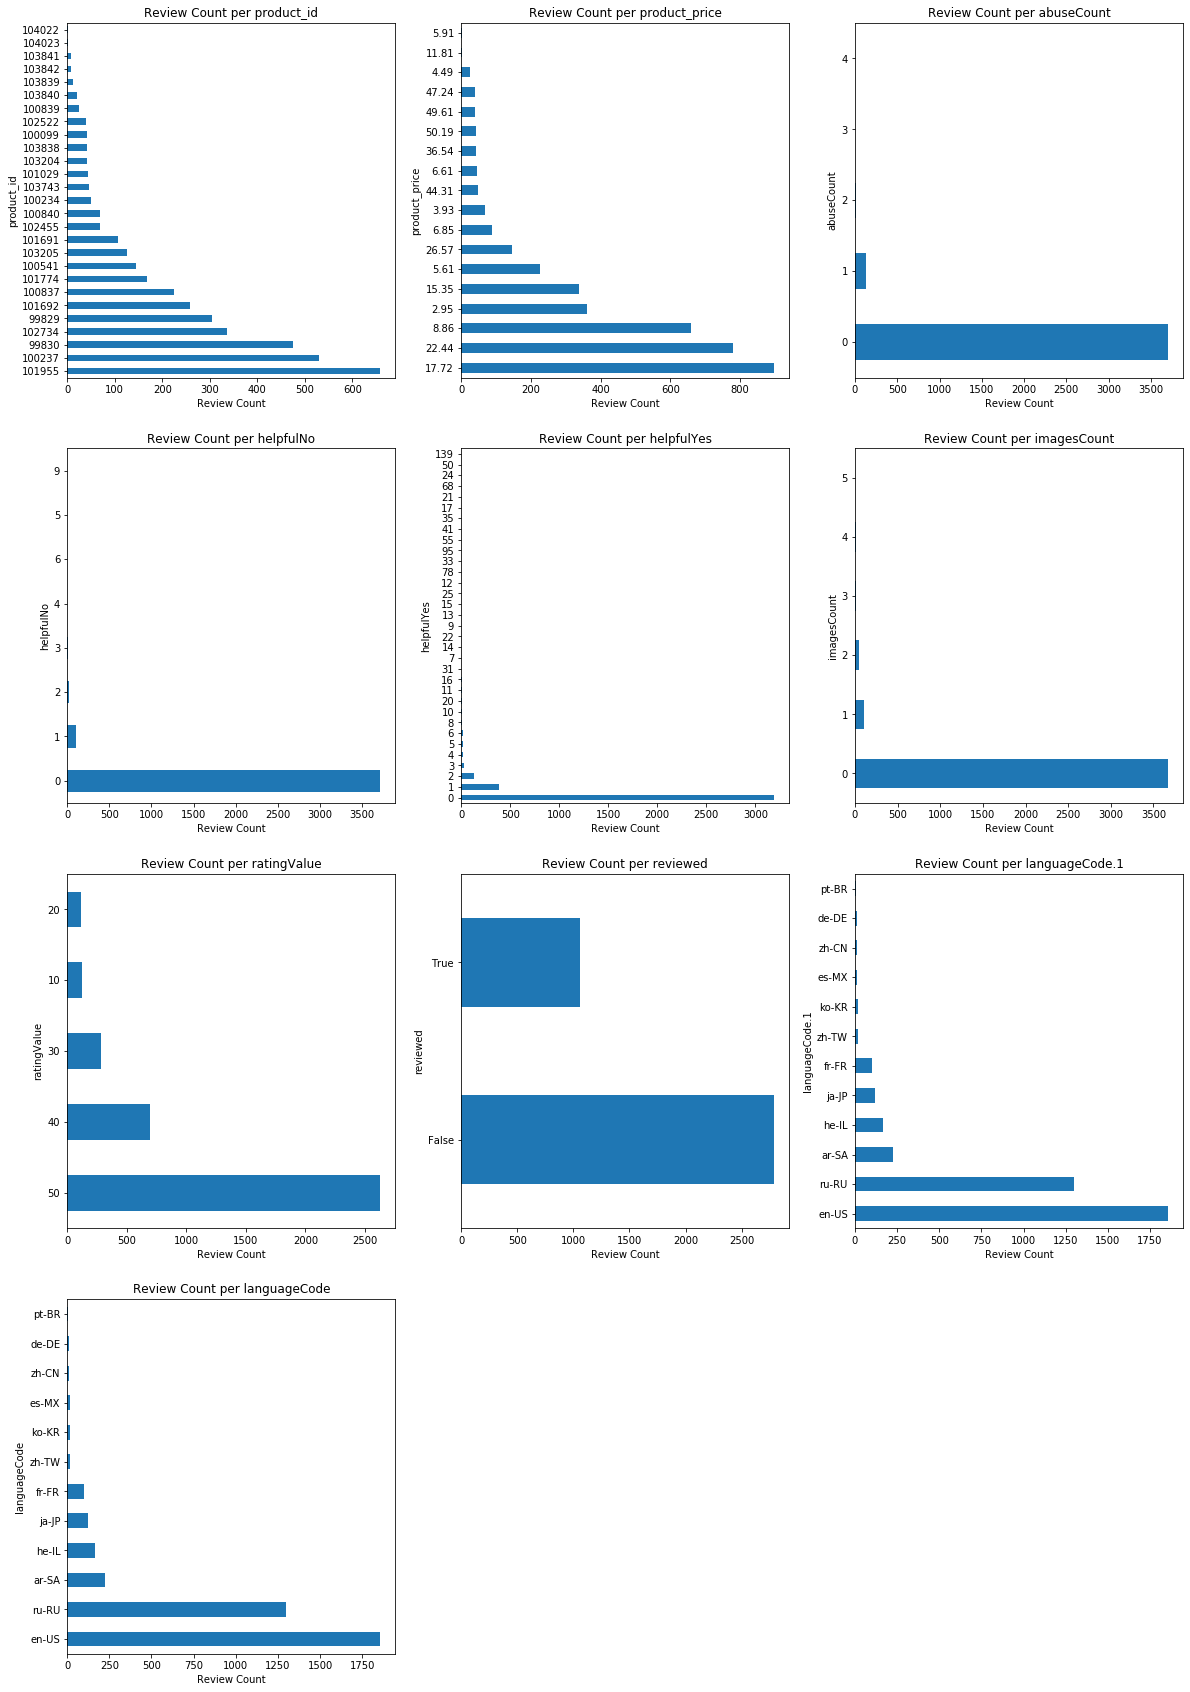

In [78]:
plt.figure(figsize=(20, 30))

for i in range(len(cols)):
    
    plt.subplot((len(cols)//3)+1, 3, i+1)
    df_productReview[cols[i]].value_counts().plot.barh()
    plt.title(f"Review Count per {cols[i]}")
    plt.ylabel(cols[i])
    plt.xlabel('Review Count')

## Advance Questions  

* what other information might be useful to the analysis?
* What is the sentiment of the review?
* Does the name of the product contribute to their sales?
* Is customerNickname useful?  
* How can the review title be useful?
* How can the review text be useful?

 
